In [72]:
import random
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

In [73]:
num_cluster = 2
num_data_points = 1000
dimension = 2
resolution = 1080*2

# Generate Random Centroids

In [74]:
rand_x1 = np.random.randint(-5, 5, size=num_cluster).tolist()
rand_x2 = np.random.randint(-5, 5, size=num_cluster).tolist()

In [75]:
centers = list(zip(rand_x1, rand_x2))
sd = np.random.rand(num_cluster).tolist()
cluster_std = [0.5+s/2 for s in sd]
x, y = make_blobs(n_samples=num_data_points, cluster_std=cluster_std, centers=centers, n_features=2, random_state=1)

data_points = np.array(x)

In [76]:
random_centroid_x1 = np.random.randint(-8,8, size=num_cluster)
random_centroid_x2 = np.random.randint(-8,8, size=num_cluster)
centroids = np.array(list(zip(random_centroid_x1, random_centroid_x2)))

In [77]:
def find_closest_centroids(data_points, centroids):
    '''
    Args:
    data_points: A numpy array with shape: (num_data_points, num_dimensions)
    centroids: A numpy array with shape: (num_cluster, num_dimensions)
    
    Returns:
    A list with cluster numbers
    '''
    
    num_data_points=data_points.shape[0]
    num_dimensions=data_points.shape[1]
    num_centroids=centroids.shape[0]
    centroid_numbers = [0] * num_data_points
    
    for dp in range(num_data_points):
        
        # get one data point
        one_dp = data_points[dp,]
        
        # loop over all the centroids and keep the closest one
        for c in range(num_centroids):
            
            # get one centroid
            one_c = centroids[c,]
            
            # calculate euclidian distance
            if num_dimensions==2:
                dist = np.sqrt(np.sum((one_dp-one_c)**2))
            elif num_dimensions==3:
                dist = np.cbrt(np.sum((one_dp-one_c)**2))
            else:
                # this won't be useful for visualization
                dist = np.sum((one_dp-one_c)**num_dimensions)**(1/num_dimensions)
            
            # keep the shortest distance
            if c==0:
                dist_cache=dist
                centroid_numbers[dp]=0
                
            if dist<dist_cache:
                dist_cache=dist
                centroid_numbers[dp]=c
                
        del dist_cache
    return(centroid_numbers)

In [78]:
def move_centroids(data_points, centroid_nums):
    
    '''
    Args:
    data_points: A numpy array with shape: (num_data_points, num_dimensions)
    centroid_nums: A list of integers showing the cluster numbers
    
    Returns:
    A numpy array with updated cluster centers

    '''
    centroid_numbers = find_closest_centroids(data_points, centroids)
    num_centroids = centroids.shape[0]
    num_dimension=data_points.shape[1]
    num_data_points=data_points.shape[0]
    
    updated_centroids = np.zeros([num_centroids, num_dimension])
    
    for c in range(num_centroids):
        bool_index = [i==c for i in centroid_numbers]
        points_in_cluster_c = data_points[bool_index]
        np.array(points_in_cluster_c)
        updated_centroids[c,:] = np.mean(points_in_cluster_c, axis=0)
    return(updated_centroids)

## Running the Algorithm

In [79]:
num_iteration = 10

clusters_history=[find_closest_centroids(data_points, centroids)]
centroids_history=[centroids]

for i in range(num_iteration):
    clusters = find_closest_centroids(data_points, centroids)
    centroids = move_centroids(data_points, clusters)
    clusters_history.append(clusters)
    centroids_history.append(centroids)

# Plotting

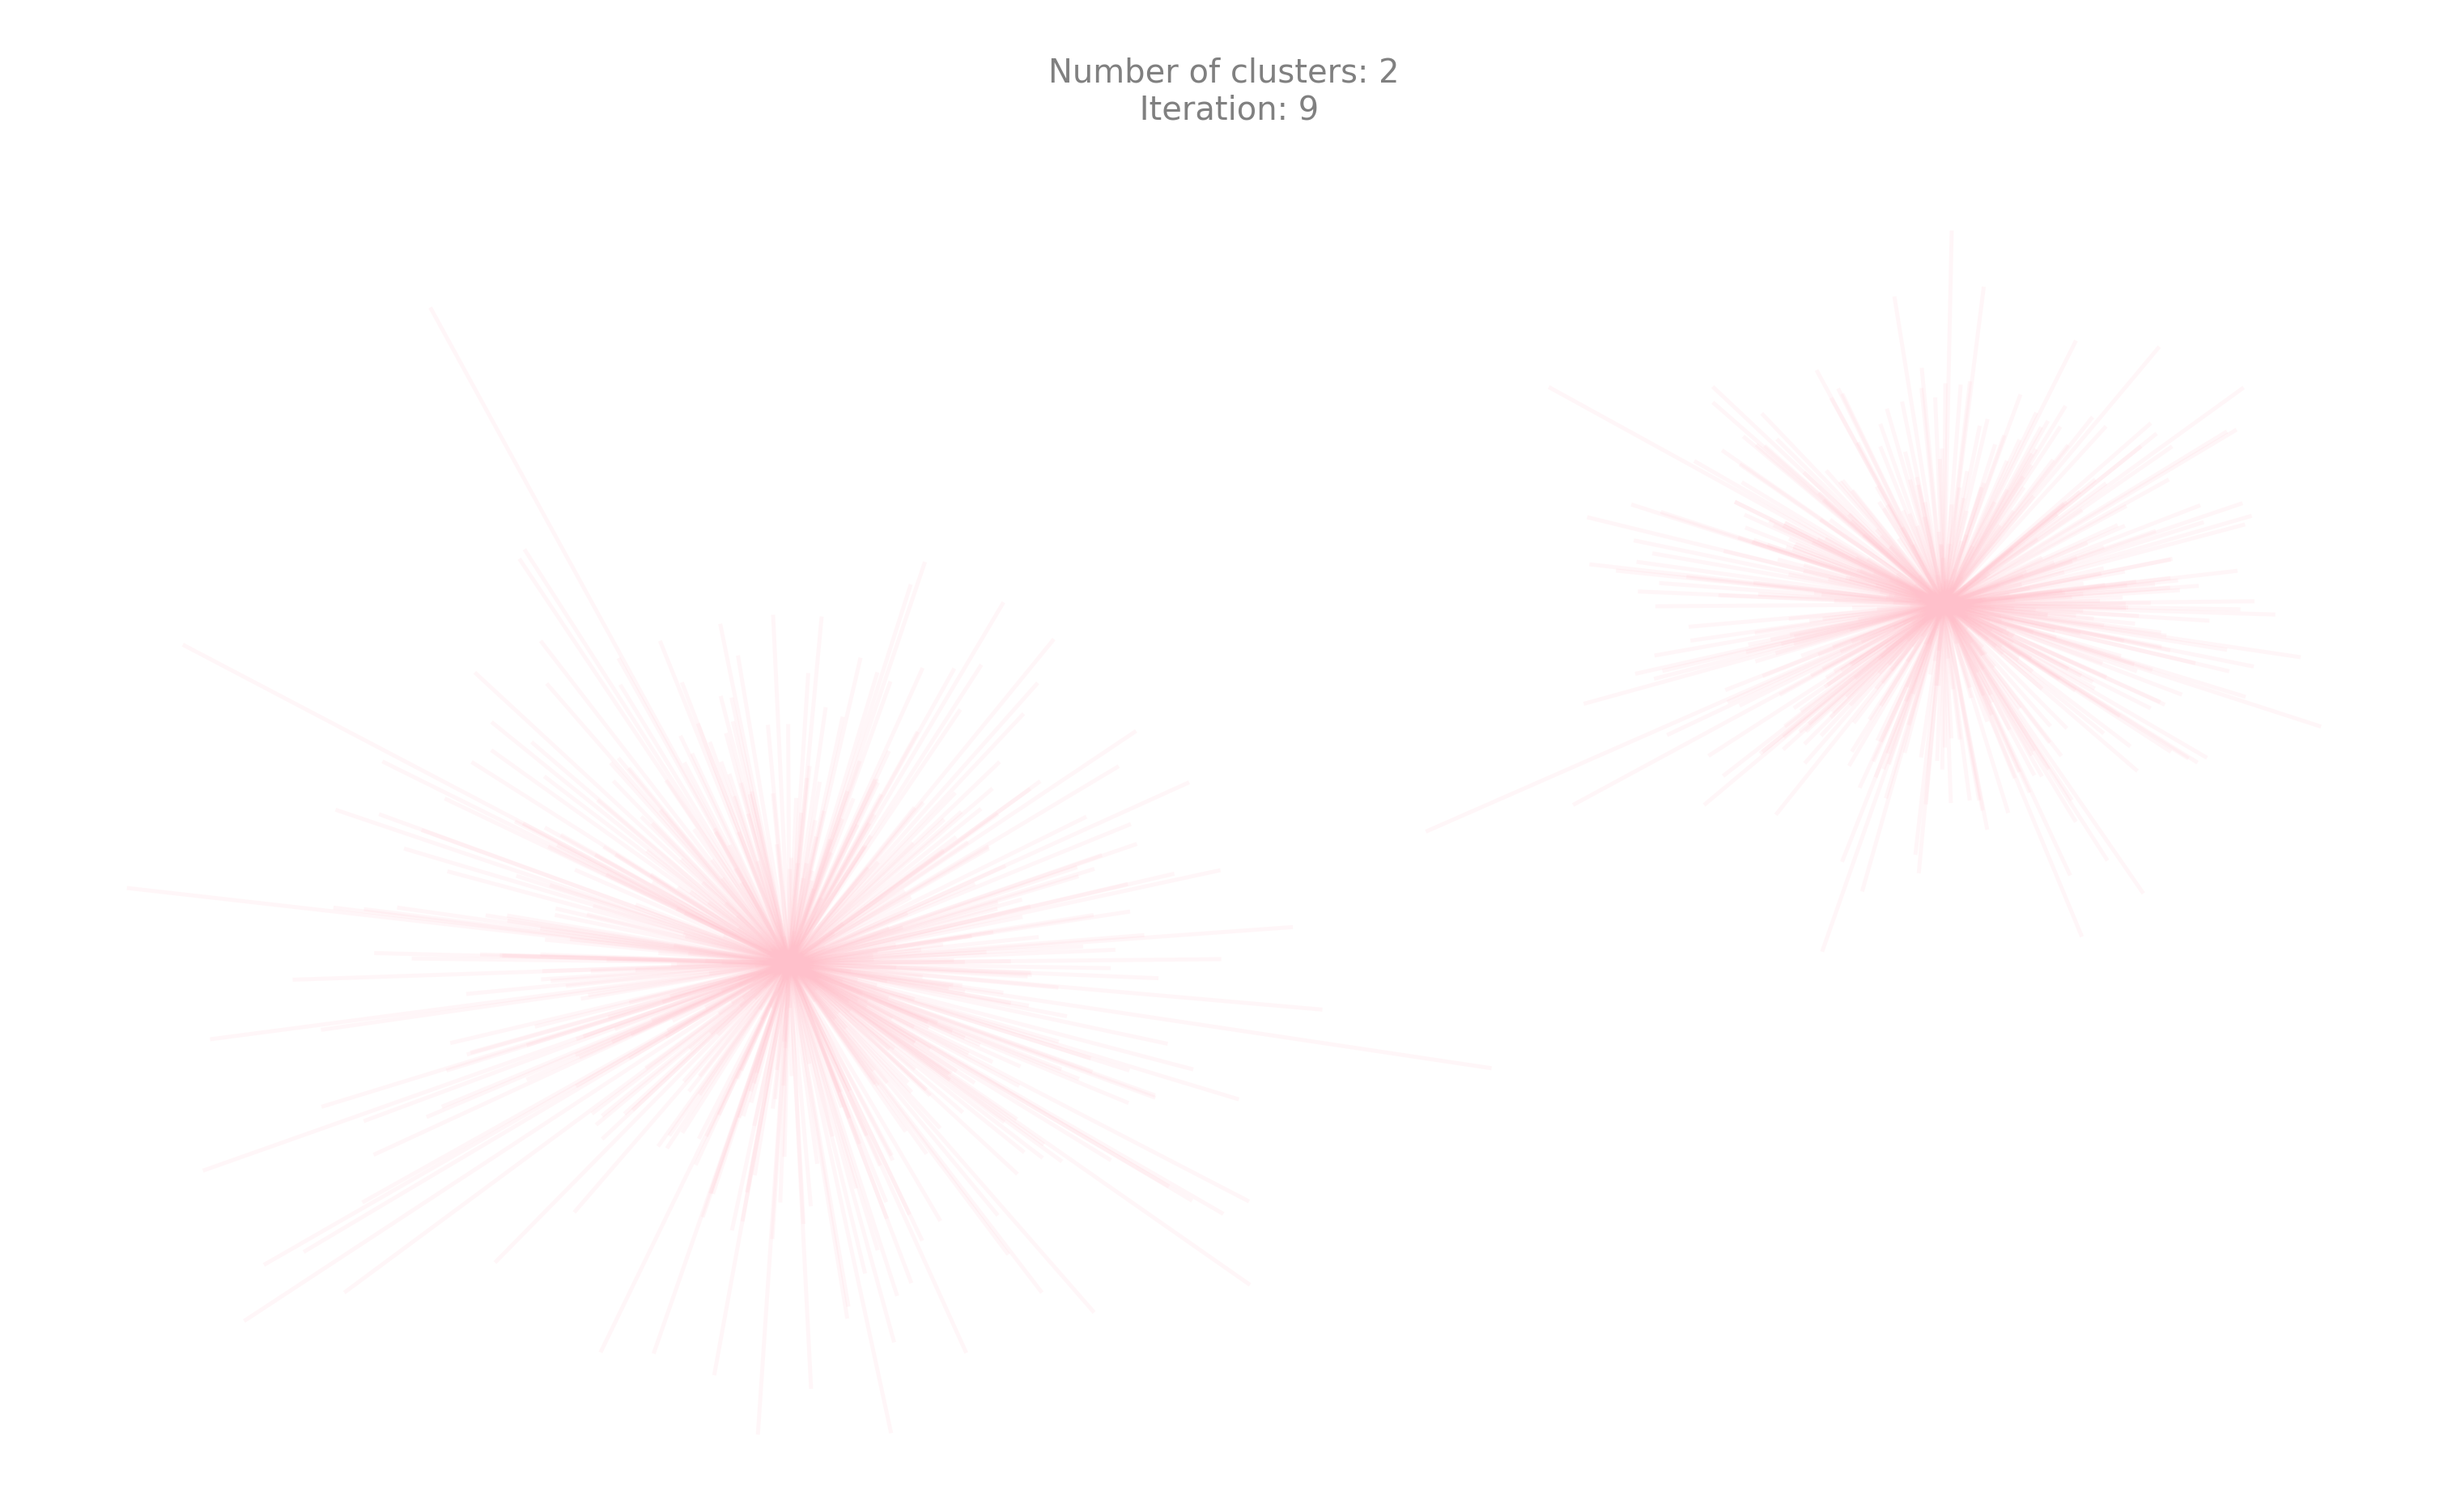

In [80]:
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['figure.facecolor'] = 'black'
plt.style.use('dark_background')
plt.figure(figsize=(16, 9), dpi= resolution/9, facecolor='w', edgecolor='k')
plt.axis('off')
plt.box(False)

# data
x1 = data_points[:,0]
x2 = data_points[:,1]
centroid_x1 = [centroids[i,0] for i in clusters]
centroid_x2 = [centroids[i,1] for i in clusters]

# title
title_style = {'color' : 'gray', 'verticalalignment': 'baseline'}
title_text = '''
Number of clusters: {num_cluster}\n Iteration: {f}
'''.format(f=f, num_cluster=num_cluster, num_data_points=num_data_points)
plt.title(title_text, fontdict = title_style)

# line segments
for i in range(num_data_points):
    plt.plot([x1[i], centroid_x1[i]], [x2[i], centroid_x2[i]], 'pink', alpha = 0.13)
    
plt.scatter(centroids[:,0], centroids[:,1], marker = '.', color = 'white')